# **Questionário**

## **1 -** Calcule a modularidade para a rede Jazz usando método fastgreedy.

In [12]:
jazz, nodes_original = clean_graph(nx.read_edgelist('data/jazz.txt', nodetype = int))

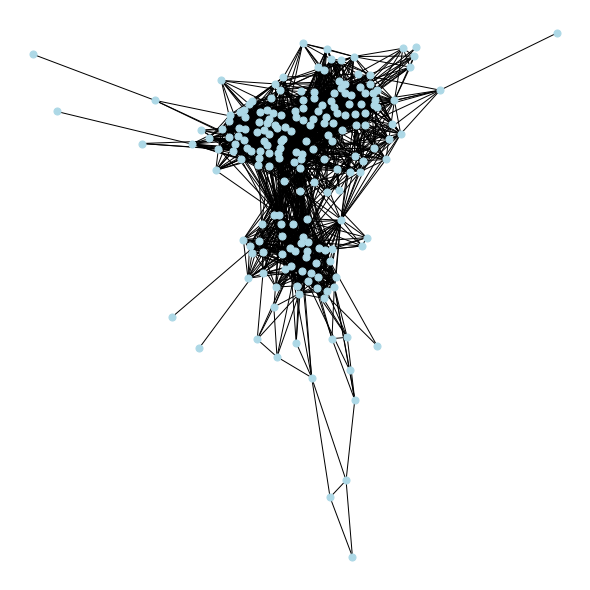

In [61]:
jazz_positions = nx.spring_layout(jazz)

nx.draw(jazz, pos = jazz_positions, node_color = 'lightblue', node_size = 50, with_labels = False)

In [109]:
jazz_fastgreedy_communities = list(greedy_modularity_communities(jazz))

for k in np.arange(0, len(jazz_fastgreedy_communities)):
    
    print(f'Communities {k}:\n\n{sorted(jazz_fastgreedy_communities[k])}\n')

Communities 0:

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 100, 111, 120, 125, 126, 127, 128, 129, 130, 132, 134, 135, 136, 144, 145, 146, 147, 148, 149, 150, 151, 152, 157, 158, 159, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 191, 194]

Communities 1:

[24, 25, 26, 27, 47, 53, 54, 73, 74, 75, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 112, 113, 114, 115, 116, 117, 118, 119, 121, 122, 123, 124, 131, 133, 137, 139, 143, 154, 156, 161, 162, 190, 192, 193, 197]

Communities 2:

[28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 48, 49, 50, 51, 52, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 76, 77, 78, 138, 140, 141, 142, 153, 155, 160, 179, 180, 181, 182, 183, 184, 185, 189, 195, 196]

Communities 3:

[186, 187, 188]



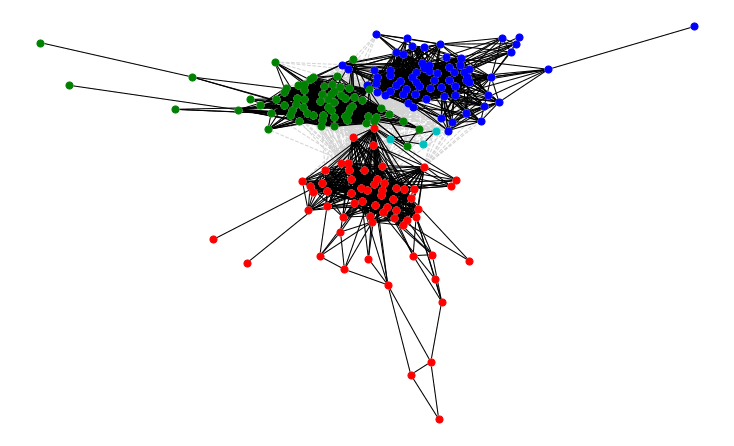

In [63]:
fig = plt.figure(figsize = (10, 6))

nx.draw(jazz, pos = jazz_positions, node_color = 'white', edge_color = 'lightgray', style = 'dashed', node_size = 50)

aux = 0

for cm in jazz_communities:
    
    nx.draw(jazz.subgraph(cm), 
            pos = jazz_positions, 
            node_color = colors[aux],
            node_size = 50,
            font_color = 'white')
    aux += 1

In [102]:
jazz_fastgreedy_communities_list = np.zeros(len(jazz.nodes()))

nc = 0 

for k in np.arange(0, len(jazz_fastgreedy_communities)):

    jazz_fastgreedy_communities_list[sorted(jazz_fastgreedy_communities[k])] = nc

    nc += 1

In [115]:
jazz_fastgreedy_modularity = modularity(jazz, jazz_fastgreedy_communities_list)

In [120]:
print(f'Modularity(Q) for the Fastgreedy method: {jazz_fastgreedy_modularity}')

Modularity(Q) for the Fastgreedy method: 0.4389078153753761


## **2 -** Calcule a modularidade para a rede Jazz usando método Louvain.

In [160]:
jazz_louvain_communities = community_louvain.best_partition(jazz)
jazz_louvain_communities_list = np.array(list(jazz_louvain_communities.values()))

jazz_louvain_modularity = modularity(jazz, jazz_louvain_communities_list)

In [161]:
print(f'Modularity(Q) for the Louvain method: {jazz_louvain_modularity}')

Modularity(Q) for the Louvain method: 0.44461528823854385


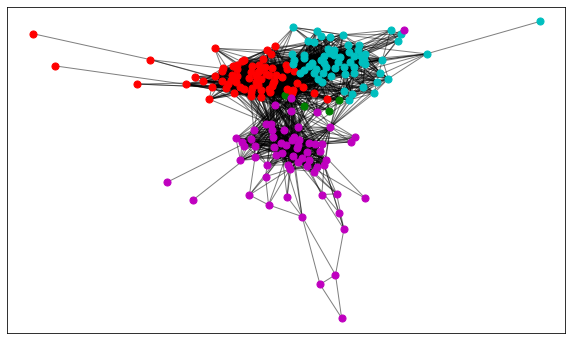

In [145]:
fig = plt.figure(figsize = (10, 6))

count = 0

for com in set(jazz_louvain_communities.values()):
    
    count += 1
    
    list_nodes = [nodes for nodes in jazz_louvain_communities.keys() if jazz_louvain_communities[nodes] == com]

    nx.draw_networkx_nodes(jazz, jazz_positions, list_nodes, node_size = 50, node_color = colors[int(count)])
    
nx.draw_networkx_edges(jazz, jazz_positions, alpha = 0.5)

## **3 -** Considere o método de geração de redes LFR_benchmark_graph. Obtenha os valores da modularidade para μ=0.05,μ=0.1,μ=0.2. Use o código a seguir para gerar as redes. Use o algoritmo de Louvain.


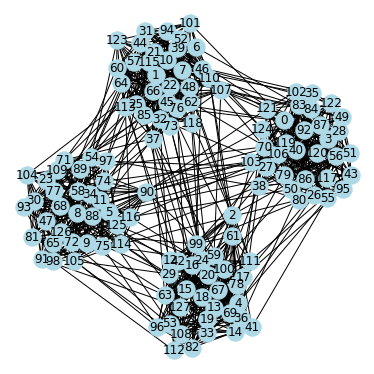

In [213]:
G1 = LFR_benchmark(0.05)

In [186]:
G1_louvain_communities = community_louvain.best_partition(G1)
G1_louvain_communities_list = np.array(list(G1_louvain_communities.values()))

G1_louvain_modularity = modularity(G1, G1_louvain_communities_list)

In [187]:
print(f'Modularity(Q) for the Louvain method: {G1_louvain_modularity}')

Modularity(Q) for the Louvain method: 0.6436395353978381


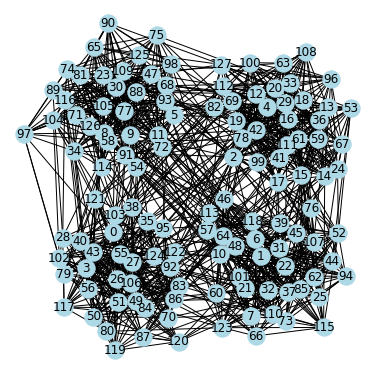

In [188]:
G2 = LFR_benchmark(0.1)

In [189]:
G2_louvain_communities = community_louvain.best_partition(G2)
G2_louvain_communities_list = np.array(list(G2_louvain_communities.values()))

G2_louvain_modularity = modularity(G2, G2_louvain_communities_list)

In [190]:
print(f'Modularity(Q) for the Louvain method: {G2_louvain_modularity}')

Modularity(Q) for the Louvain method: 0.5427818606053952


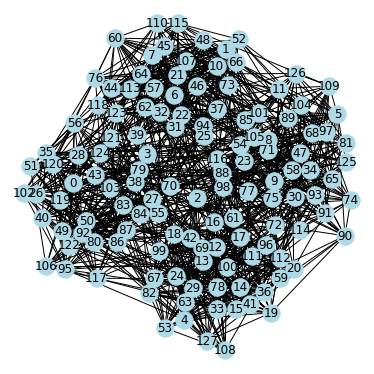

In [191]:
G3 = LFR_benchmark(0.2)

In [192]:
G3_louvain_communities = community_louvain.best_partition(G3)
G3_louvain_communities_list = np.array(list(G3_louvain_communities.values()))

G3_louvain_modularity = modularity(G3, G3_louvain_communities_list)

In [193]:
print(f'Modularity(Q) for the Louvain method: {G3_louvain_modularity}')

Modularity(Q) for the Louvain method: 0.444879099758203


## **4 -** Considere o método de geração de redes LFR_benchmark_graph. Obtenha os valores da modularidade para μ=0.05,μ=0.1,μ=0.2. Use o código a seguir para gerar as redes. Use o algoritmo fast greedy.

In [214]:
G1_fastgreedy_communities = list(greedy_modularity_communities(G1))
G1_fastgreedy_communities_list = np.zeros(len(G1.nodes()))

nc = 0 

for k in np.arange(0, len(G1_fastgreedy_communities)):

    G1_fastgreedy_communities_list[sorted(G1_fastgreedy_communities[k])] = nc

    nc += 1

In [215]:
G1_fastgreedy_modularity = modularity(G1, G1_fastgreedy_communities_list)

In [216]:
print(f'Modularity(Q) for the Fastgreedy method: {G1_fastgreedy_modularity}')

Modularity(Q) for the Fastgreedy method: 0.6436395353978381


In [217]:
G2_fastgreedy_communities = list(greedy_modularity_communities(G2))
G2_fastgreedy_communities_list = np.zeros(len(G2.nodes()))

nc = 0 

for k in np.arange(0, len(G2_fastgreedy_communities)):

    G2_fastgreedy_communities_list[sorted(G2_fastgreedy_communities[k])] = nc

    nc += 1

In [218]:
G2_fastgreedy_modularity = modularity(G2, G2_fastgreedy_communities_list)

In [219]:
print(f'Modularity(Q) for the Fastgreedy method: {G2_fastgreedy_modularity}')

Modularity(Q) for the Fastgreedy method: 0.5427818606053952


In [220]:
G3_fastgreedy_communities = list(greedy_modularity_communities(G3))
G3_fastgreedy_communities_list = np.zeros(len(G3.nodes()))

nc = 0 

for k in np.arange(0, len(G3_fastgreedy_communities)):

    G3_fastgreedy_communities_list[sorted(G3_fastgreedy_communities[k])] = nc

    nc += 1

In [221]:
G3_fastgreedy_modularity = modularity(G3, G3_fastgreedy_communities_list)

In [223]:
print(f'Modularity(Q) for the Fastgreedy method: {G3_fastgreedy_modularity}')

Modularity(Q) for the Fastgreedy method: 0.4349088598177228


## **Constantes**

In [52]:
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']

## **Functions**

In [176]:
def LFR_benchmark(mu = 0.05):
    
    N = 128

    tau1 = 3

    tau2 = 1.5

    k =16

    minc = 32

    maxc = 32

    G = nx.LFR_benchmark_graph(n = N, tau1 = tau1, tau2 = tau2, mu = mu, min_degree = k, max_degree = k, min_community=minc, max_community = maxc, seed = 10)

    pos=nx.spring_layout(G)

    fig= plt.figure(figsize=(5,5))

    nx.draw(G, pos=pos, node_color = 'lightblue', with_labels = True)
    
    return G

In [89]:
def communities(G, show = False):
    
    c = list(greedy_modularity_communities(G))

    cms = np.zeros(len(G.nodes()))

    nc = 0 

    for k in np.arange(0, len(c)):

        cms[sorted(c[k])] = nc

        nc += 1
        
        if show:
            print(f'Community{sorted(c[k])}')
    
    return cms

In [99]:
def modularity(G, c):
    
    A = nx.adjacency_matrix(G)
    
    N = len(G)
    M = G.number_of_edges()
    
    Q = 0 
    
    for i in np.arange(N):
        
        ki = len(list(G.neighbors(i)))
        
        for j in np.arange(N):
            
            if(c[i] == c [j]):
                
                kj = len(list(G.neighbors(j)))
                
                Q += A[i, j] - (ki*kj)/(2*M)
    
    Q = Q/(2*M)
    
    return Q

In [2]:
def clean_graph(G, remove_edges = True):
    
    G = G.to_undirected()
    nodes_original = G.nodes
    
    if remove_edges:
        
        G.remove_edges_from(nx.selfloop_edges(G))
    
    G_cc = sorted(nx.connected_components(G), key = len, reverse =True)
    G = G.subgraph(G_cc[0])
    G = nx.convert_node_labels_to_integers(G, first_label = 0 )
    
    return G, nodes_original

## **Imports**

In [3]:
import numpy as np

In [4]:
import pandas as pd

In [5]:
import matplotlib.pyplot as plt

In [6]:
import networkx as nx
from networkx.algorithms import community
from networkx.algorithms.community import greedy_modularity_communities

In [7]:
from community import community_louvain

In [8]:
from itertools import chain, combinations

In [9]:
from scipy.cluster.hierarchy import dendrogram

In [22]:
import seaborn as sns

## **Settings**

In [10]:
%matplotlib inline

In [11]:
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=13)    # fontsize of the tick labels
plt.rc('ytick', labelsize=13)    # fontsize of the tick labels
plt.rc('legend', fontsize=13)    # legend fontsize
plt.rc('font', size=13)          # controls default text sizes
plt.rc('figure', figsize = (8,8)) # Set the figure size 